# Introducción a las Redes Neuronales

Actualmente, las redes neuronales (ANNs) representan una las áreas más activas en inteligencia artificial, siendo claves para la solución de problemas muy complejos como el reconocimiento de imágenes y el procesamiento del lenguaje natural.

Antes de estudiar modelos avanzados es importante tener claros algunos conceptos básicos, pero claves en el diseño de redes neuronales. En este laboratorio exploraremos esos conceptos usando Python, Keras y Scikit-learn. 

Desde el punto de vista más práctico aprenderemos a crear una red neuronal en Keras y a evaluar el efecto sus hiper-parámetros más importantes en problemas de clasificación.

## Lenguaje y Librerías

Todo el código necesario para esta actividad será desarrollado en Python. Usaremos además dos librerías: una de machine learning clásico, denominada scikit-learn y otra especializada en redes neuronales, denominada Keras.


La forma más simple de disponer de las librerías sin instalar nada es ejecutar los notebooks en Google Colab. Si se quiere disponer de ellas localmente, se recomienda la instalación de Anaconda. Si ya tiene disponible ese software y no necesita usar GPUs, los siguientes comandos crear un ambiente con las librerías necesarias.

```
conda create --name LAB2 python=3.6 pandas scikit-learn matplotlib jupyter
conda activate LAB2
conda install -c conda-forge tensorflow keras
conda deactivate LAB2
```


## Datasets & Problemas

Como nuestro objetivo es introducir conceptos básicos de redes neuronales trabajaremos con varios dataset sintéticos ``de juguete'' como XOR, blobs y espirales concéntricos.

Si alcanza el tiempo, nos ejercitaremos también sobre dos dataset reales: uno de clasificación de sentimiento en texto (IMDB) y otro de clasificación de imágenes (MNIST).



## 1. Armando una Red para Clasificación

Partiremos mostrando como armar una red neuronal para clasificación. Usaremos un dataset sintético que llamaremos XOR, por su similitud con el problema que hacia 1950 se utilizó para mostrar las limitaciones de una neurona artificial. 

Los datos generados serán bidimensionales (dos atributos), podrán pertencer a una de dos posibles clases (roja: 0, verde: 1), y tendrán la distribución que se ilustra a continuación:

<img width='500px' align='left' src='http://jricardon.github.io/BBS19lab2Files/figs/xor.png'>  

Partiremos definiendo la función de crea los datos. Luego la usaremos para simular un conjunto de datos de entrenamiento y de test (pruebas). Graficaremos el resultado para ver si coincide con lo esperado.



(10000, 2)
(10000,)
[0 1]
5000
5000


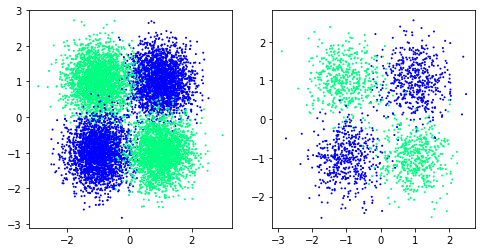

In [0]:
import numpy as np

def do_gaussianXOR(n1=2500,n2=2500, u = 1.0, std = 0.5):
   
    primer_c = np.random.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = np.random.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = np.random.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = np.random.normal(loc=[u,-u],scale=std,size=(n2,2))
    
    X = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2))) 
    #Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
  
    return X, Y.astype(int)
  

X_train,Y_train = do_gaussianXOR()
print(X_train.shape)
print(Y_train.shape)
print(np.unique(Y_train))
print(sum(Y_train==0))
print(sum(Y_train==1))

X_test,Y_test = do_gaussianXOR(n1=500,n2=500)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
axis[1].scatter(X_test[:,0], X_test[:,1], s=1, c=Y_test, cmap=plt.cm.winter)
plt.show()


Crearemos ahora nuestra primera red neuronal. Esta tendrá solo 1 capa oculta con dos neuronas y función de activación sigmoidal. 
  
1.   Para qué sirve la función *summary* de la librería?
2.   ¿Cómo indica el número de atributos de entrada?
3.   ¿Cuántos parámetros tiene la red? ¿Coindice con los esperado?


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
  
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(1, activation="sigmoid")) #kernel_initializer='orthogonal'
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Ahora usaremos los datos generados para entrenar la red. 

1.   ¿Porqué es importante considerar un escalamiento de los datos antes de entrenar? ¿Cómo se hace en el ejemplo?
2.   ¿Para qué sirve la *tasa de aprendizaje* y cómo se le indica al algoritmo de entrenamiento?
3.   ¿Qué es el *número de epochs* y cómo se le indica al algoritmo de entrenamiento?
4.   ¿Qué es el *tamaño de batch* y cómo se le indica al algoritmo de entrenamiento?
5.   ¿Con qué *función de pérdida* (loss) entrenará la red? ¿Es ésta apropiada para el problema que debe resolver?
6. Si entrena la red varias veces, ¿Obtiene siempre el mismo resultado? ¿Porqué?

In [0]:

X_train,Y_train = do_gaussianXOR(u = 1.0, std = 0.25)
X_test,Y_test = do_gaussianXOR(n1=500,n2=500,u = 1.0, std = 0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#myopt = Adam(lr=0.01)
myopt = SGD(lr=0.01)

model.compile(optimizer=myopt, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=1)


print("Train Accuracy: ",model.evaluate(X_train,Y_train, batch_size=128, verbose=0)[1])
print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])



Epoch 1/100
10000/10000 [==============================] - 0s 22us/step - loss: 0.6657 - acc: 0.6769
Epoch 2/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6647 - acc: 0.6998
Epoch 3/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6636 - acc: 0.6880
Epoch 4/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6625 - acc: 0.6964
Epoch 5/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6614 - acc: 0.7020
Epoch 6/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6602 - acc: 0.7080
Epoch 7/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6590 - acc: 0.7091
Epoch 8/100
10000/10000 [==============================] - 0s 9us/step - loss: 0.6577 - acc: 0.7076
Epoch 9/100
10000/10000 [==============================] - 0s 10us/step - loss: 0.6564 - acc: 0.7114
Epoch 10/100
10000/10000 [==============================] - 0s 9us/step - loss: 0.6551 - acc

Después del entrenamiento, la libería que estamos utilizando retorna el historial del error y de otras métricas que le indiquemos. Esto permite monitorear el entrenamiento y diagnosticar problemas.

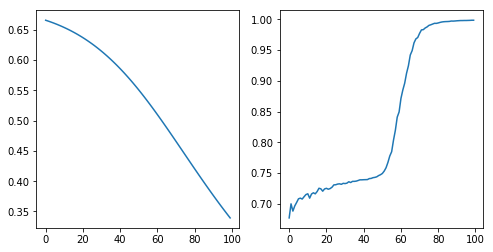

In [0]:
#history = model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=0)

import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2,figsize=(8, 4))
axis[0].plot(history.history['loss'], label='training loss')
axis[1].plot(history.history['acc'], label='training accuracy')
plt.show()


## 2. Rol de las Capas Ocultas

Para entender el rol de las capas ocultas, intentaremos visualizar las funciones que han aprendido las diferentes neuronas del modelo.

Hemos visto que cada neurona implementa una función de la forma $g(x)=\sigma(w_1x_1 + w_2x_2 + ... +w_dx_d)$ donde $x_1,x_2, ..., x_d$ denotan los estados de las neuronas vecinas. En nuestra pequeña red, las neuronas de la primera capa oculta están directamente conectadas a la entrada (dos atributos) y $\sigma$ es la función sigmoidal. Si interpretamos un valor de $g(x)$ cercano a $1$ como que la neurona ``reconoce'' $x$, y un valor cercano a $0$ como que la neurona ``no reconoce'' $x$,  podemos ver la forma de la región que ``reconoce'' cada neurona oculta.

Como la capa de salida tiene una sola neurona, y se alimenta de lo que sale de las neuronas ocultas, tenemos que la salida de la red se construye *componiendo* (uniendo, sustrayendo, etc) las regiones que reconoce cada neurona oculta.

**Intentaremos visualizar esto.**

In [0]:
import matplotlib.pyplot as plt
import matplotlib

def visualize_border(model,x,y,prob=0,title="",idx_to_plot=0):
    

    fig, axis = plt.subplots(1, 1,figsize=(12, 6))
    plt.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    cmap3 =  matplotlib.colors.ListedColormap([(127/255, 150/255, 255/255), (142/255, 178/255, 255/255), (181/255, 201/255, 255/255), (214/255, 226/255, 237/255),\
    (242/255, 221/255, 160/255), (242/255, 132/255, 68/255), (229/255, 0/255, 0/255), (1, 163/255, 10/255), (1, 249/255, 20/255), (172/255, 206/255, 100/255), (125/255, 190/255, 84/255)])

    # I want to discretize the colorbar according to values
    vals = [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    norm = matplotlib.colors.BoundaryNorm(vals, cmap3.N)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z[:,idx_to_plot]
    Z = Z.reshape(xx.shape)
    if prob <= 0:
      Z = Z > 0.5

    axis.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
    axis.scatter(x[:,0],x[:,1],s=5,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)

    plt.title(title)
    plt.show()
      
def visualize_border_hidden(model,x,y,n_rows,n_cols,prob=0,title=""):

    fig, axis = plt.subplots(n_rows, n_cols,figsize=(24, 12))
    print(axis.shape)
    counter = 0

    for r in range(n_rows):
        for c in range(n_cols):
            if n_cols > 1:
              current_ax = axis[r,c]
            else:
              current_ax = axis[r]
              
            current_ax.scatter(x[:,0], x[:,1], s=1, c=y, cmap=plt.cm.winter)
            h = .02 # step size in the mesh
            x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
            y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
            print(Z.shape)
            Z = Z[:,counter]
            counter +=1
            Z = Z.reshape(xx.shape)
            if prob <= 0:
              Z = Z > 0.5
            print(Z.shape)
            current_ax.contourf(xx, yy, Z ,cmap=plt.cm.YlGn)
            current_ax.scatter(x[:,0],x[:,1],s=2,c=y,cmap=plt.cm.YlGn,edgecolor='k', linewidth=1)
            #axis.contour(xx, yy, Z,levels=[-1, 0, 1])
        
        plt.title(title)
    
    plt.show()



Veremos para comenzar la función de clasificación que aprendió la neurona de salida. Como se predice una probabilidad, podemos ver en qué zonas del espacio de características la neurona predice 1 (verde, prob>0.5) o 0 (amarillo, prob <0.5).

*   ¿Es lineal la función de clasificación que aprende la neurona de salida?



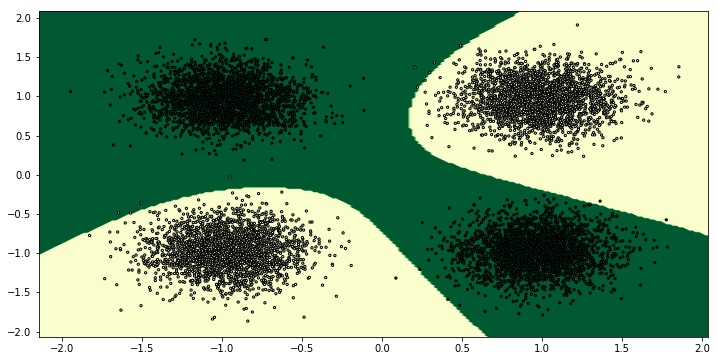

In [0]:
visualize_border(model,X_train,Y_train)


Miremos ahora las probabilidades que aprendió la neurona de salida (la probabilidad aprendida por la neurona corresponde a la probabilidad de que el dato sea de la clase 1).

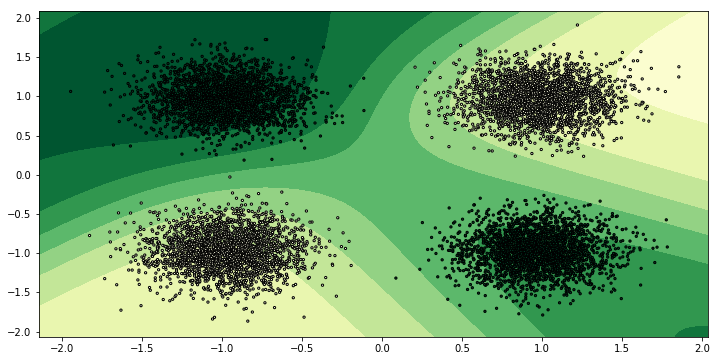

In [0]:
visualize_border(model,X_train,Y_train,prob=1)

Visualizaremos ahora la función aprendida por las 4 neuronas ocultas. Como cada una usa una función de activación sigmoidal, podemos ver en qué zonas del espacio de características la neurona retorna 1 (verde) o 0 (amarillo).

*   ¿Como se relaciona la función aprendida por las neuronas ocultas con la función de salida?



(2, 2)
(43890, 4)
(209, 210)
(43890, 4)
(209, 210)
(43890, 4)
(209, 210)
(43890, 4)
(209, 210)


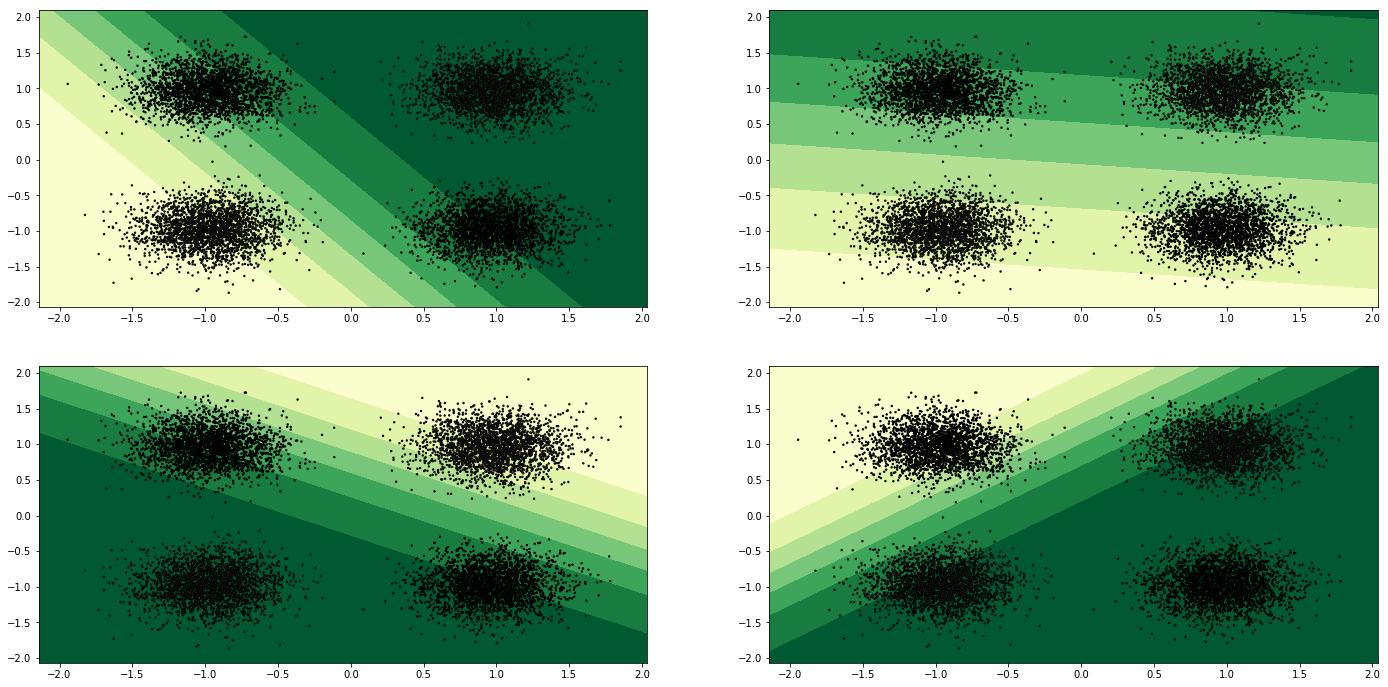

In [0]:
model2 = Sequential()
for layer in model.layers[:-1]: # just exclude last layer from copying
    model2.add(layer)
#model2.summary()

nrows = 2
ncols = 2

visualize_border_hidden(model2,X_train,Y_train,n_rows=nrows,n_cols=ncols,prob=1)




## 3. Efecto del Número de Neuronas

En esta sección evaluaremos el efecto de utilizar más o menos neuronas en la capa oculta. Aumentar el número de neuronas debise aumentar la flexibilidad del modelo para aprender patrones complejos, pero hace también más probable que observemos overfitting, es decir un buen desempeño en el conjunto de entrenamiento y uno malo (o no tan bueno) en el conjunto de test.

Aprenderemos por lo tanto a monitorear la tendencia del modelo a overfitting usando un conjunto de validación. Este es el método más simple para hacerlo. Un método más potente es $k$-fold cross-validation. Existen además técnicas para manejar este problema que se conocen como métodos de regularización (weight decay, dropout data augmentation, etc). 



### 3.1 Más Neuronas = Más Poder

Para esta parte usaremos un nuevo dataset sintético que corresponde a 20 gausianas multi-dimensionales (100 atributos). Como tenemos muchos atributos, no podemos visualizar fácilmente la disposición de las clases. Usaremos una herramienta denominada TSNE que permite ``proyectar'' datos multi-dimensionales en el plano (2 atributos) manteniendo juntos aquellos que son similares en el espacio original (100 atributos).

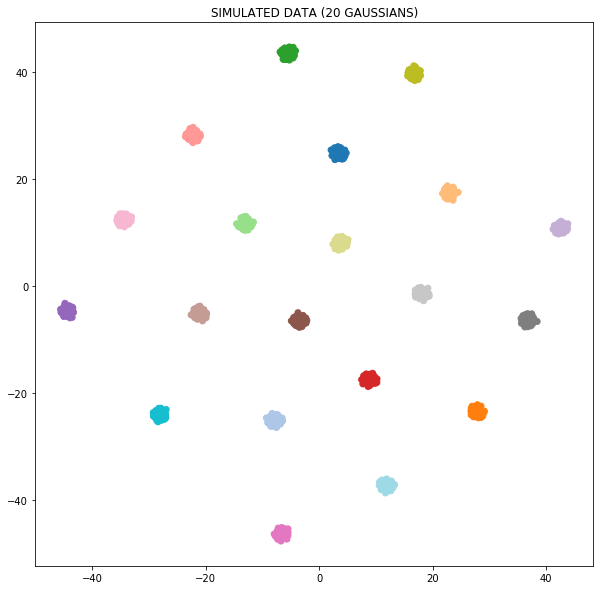

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 10))
y_color = y/20
ax.scatter(X_embedded[:,0],X_embedded[:,1],c=y_color,cmap=plt.cm.tab20)
ax.set_title("SIMULATED DATA (20 GAUSSIANS)")
plt.show()

y = to_categorical(y)

n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


13
SHAPE (1000, 20)
20
(500, 100)
100
CREANDO UNA RED CON 10 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.052, TEST ACC:0.050
CREANDO UNA RED CON 30 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.100, TEST ACC:0.100
CREANDO UNA RED CON 50 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.076, TEST ACC:0.076
CREANDO UNA RED CON 100 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.342, TEST ACC:0.342
CREANDO UNA RED CON 200 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.520, TEST ACC:0.527
CREANDO UNA RED CON 400 NEURONAS OCULTAS Y 20 NEURONAS DE SALIDA
TRAIN ACC:0.966, TEST ACC:0.964


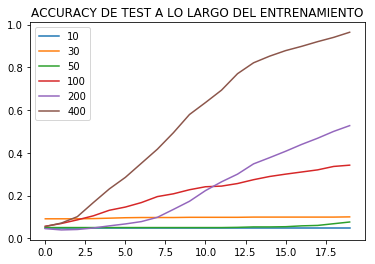

In [11]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import keras
import numpy as np


X, y = make_blobs(n_samples=2000, centers=20, n_features=100, cluster_std=2, random_state=2)

# split into train and test
trainX, testX, trainy, testy = train_test_split(X, y, stratify=y, test_size=0.5)
trainX, valX, trainy, valy = train_test_split(trainX, trainy, stratify=trainy, test_size=0.5)

trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    print("CREANDO UNA RED CON %d NEURONAS OCULTAS Y %d NEURONAS DE SALIDA"%(n_nodes,n_classes))
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='sigmoid'))
    model.add(Dense(n_nodes, activation='sigmoid'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile model
    opt = SGD()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model on train set
    history = model.fit(trainX, trainy, epochs=20, verbose=0, batch_size=128, validation_data=(testX, testy))
    # evaluate model on test set
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc, train_acc

# evaluate model and plot learning curve with given number of nodes
#num_nodes = [1, 2, 3, 4, 5, 6, 7, 8]
num_nodes = [10, 30, 50, 100, 200, 400]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, acc_test, acc_train = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    
    print('TRAIN ACC:%.3f, TEST ACC:%.3f' % (acc_train, acc_test))
    # plot learning curve
    #pyplot.plot(history.history['acc'], label=str(n_nodes))
    pyplot.plot(history.history['val_acc'], label=str(n_nodes))
    pyplot.title("ACCURACY DE TEST A LO LARGO DEL ENTRENAMIENTO")

    # show the plot
pyplot.legend()
pyplot.show()

### 3.2 Más Neuronas = Más Riesgo de Overfitting

En este ejemplo, veremos que un número mayor de neuronas puede traducirse en mejores resultados sobre el conjunto de entrenamiento, pero no en mejores resultados sobre datos futuros/nuevos.

Trabajaremos con un dataset de análisis de sentimiento muy conocido y denominado IMDB, que contiene 25.000 revisiones/opiniones de/sobre películas que han sido clasificadas por humanos como positivas (1) o negativas (0). Como nuestro objetivo no es el análisis de sentimiento en sí, usaremos una representación básica de los textos, denominada "bag of words".



[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 2000) (25000, 2000)
IMDB [0 1]
SHAPE Y (25000, 2)
SHAPE X (20000, 2000)
CREANDO UNA RED CON 2 NEU

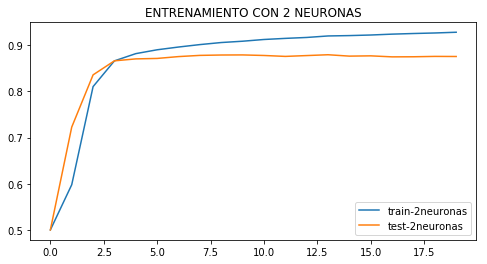

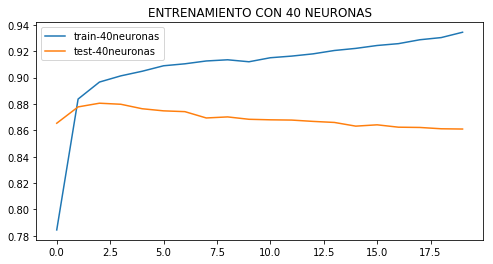

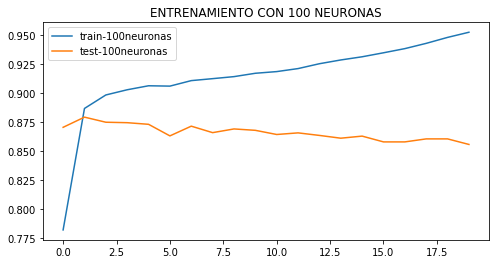

In [24]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import numpy as np

from keras.datasets import imdb

def bag_of_words(list_words,num_words):
  n = len(list_words)  
  X = np.zeros((n,num_words))
  for idx in range(n):
    for w_idx in list_words[idx]:
      X[idx,w_idx] = 1
  
  return X
  
number_words = 2000
(trainX, trainy), (testX, testy) = imdb.load_data(num_words=number_words)
print(trainX[0])

trainX = bag_of_words(trainX,number_words)
testX = bag_of_words(testX,number_words)

print(trainX.shape,testX.shape)

print("IMDB",np.unique(trainy))

trainX, valX, trainy, valy = train_test_split(trainX,trainy,stratify=trainy,test_size=0.2)
trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

n_epochs = 20

def evaluate_model(n_nodes, trainX, trainy, testX, testy, valX, valy):
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    print("CREANDO UNA RED CON %d NEURONAS OCULTAS Y %d NEURONAS DE SALIDA"%(n_nodes,n_classes))
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='sigmoid'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_nodes, activation='sigmoid'))
    #model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    # compile model
    opt = Adam()
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    history = model.fit(trainX, trainy, epochs=n_epochs, verbose=0, batch_size=128, validation_data=(valX, valy))
   
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_nodes = [2, 40, 100]

for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, acc_test, acc_train = evaluate_model(n_nodes, trainX, trainy, testX, testy, valX, valy)
    
    print('TRAIN ACC:%.3f, TEST ACC:%.3f' % (acc_train, acc_test))
    # plot learning curve
    
    fig, axis = plt.subplots(1, 1, figsize=(8, 4))
    axis.plot([int(i) for i in range(n_epochs)], history.history['acc'], label='train-'+str(n_nodes)+'neuronas')
    axis.plot([int(i) for i in range(n_epochs)], history.history['val_acc'], label='test-'+str(n_nodes)+'neuronas')
    plt.title("ENTRENAMIENTO CON %d NEURONAS"%n_nodes)
    plt.legend()

# show the plot
plt.show()

## 4. Efecto del Número de Capas

En esta sección evaluaremos el efecto de utilizar más o menos capas ocultas.  Aumentar el número de neuronas debise aumentar la flexibilidad del modelo de forma aún más radical que aumentando el número de neuronas. Aprenderemos por lo tanto a monitorear la tendencia del modelo a overfitting usando un conjunto de validación.

Para todo esto usaremos el mismo dataset empleado en la sección anterior.

CREANDO UNA RED CON 1 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.994
CREANDO UNA RED CON 2 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 1.000, TEST ACCURACY. 0.982
CREANDO UNA RED CON 3 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.967
CREANDO UNA RED CON 4 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.999, TEST ACCURACY. 0.975
CREANDO UNA RED CON 5 CAPAS OCULTAS, 5 NEURONAS OCULTAS (C/U) Y 20 NEURONAS DE SALIDA
TRAIN ACCURACY: 0.997, TEST ACCURACY. 0.971


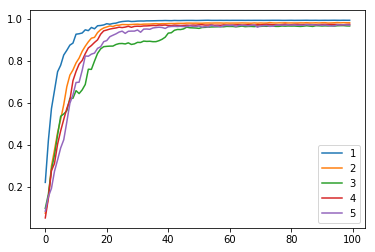

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
X, y = make_blobs(n_samples=10000, centers=20, n_features=100, cluster_std=4, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = 5000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def evaluate_layers(n_layers, n_neurons_per_layer, trainX, trainy, testX, testy):

    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    print("CREANDO UNA RED CON %d CAPAS OCULTAS, %d NEURONAS OCULTAS (C/U) Y %d NEURONAS DE SALIDA"%(n_layers,n_neurons_per_layer,n_classes))
    
    model = Sequential()
    model.add(Dense(n_neurons_per_layer, input_dim=n_input, activation='relu')) 
    
    for _ in range(1, n_layers):
        model.add(Dense(n_neurons_per_layer, activation='relu'))
        
    model.add(Dense(n_classes, activation='softmax'))

    opt = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    n_epochs = 100
    history = model.fit(trainX, trainy, epochs=n_epochs, validation_data=(testX, testy), verbose=0, batch_size=64)
    
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    n_h = 5
    history, test_accuracy, train_accuracy = evaluate_layers(n_layers, n_h, trainX, trainy, testX, testy)
    print('TRAIN ACCURACY: %.3f, TEST ACCURACY. %.3f' % (train_accuracy,test_accuracy))
    
    # plot learning curve
    pyplot.plot(history.history['val_acc'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 2000) (25000, 2000)
IMDB [0 1]
SHAPE Y (25000, 2)
SHAPE X (20000, 2000)
CREANDO UNA RED CON 1 CAP

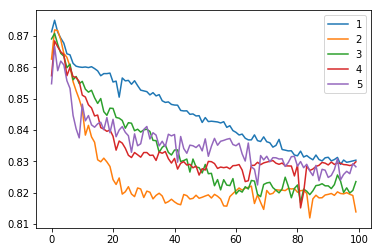

In [25]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import numpy as np

from keras.datasets import imdb

def bag_of_words(list_words,num_words):
  n = len(list_words)  
  X = np.zeros((n,num_words))
  for idx in range(n):
    for w_idx in list_words[idx]:
      X[idx,w_idx] = 1
  
  return X
  
number_words = 2000
(trainX, trainy), (testX, testy) = imdb.load_data(num_words=number_words)
print(trainX[0])

trainX = bag_of_words(trainX,number_words)
testX = bag_of_words(testX,number_words)

print(trainX.shape,testX.shape)

print("IMDB",np.unique(trainy))

trainX, valX, trainy, valy = train_test_split(trainX,trainy,stratify=trainy,test_size=0.2)
trainy = to_categorical(trainy)
valy = to_categorical(valy)
testy = to_categorical(testy)

num_classes = 2
print("SHAPE Y",testy.shape)
print("SHAPE X", trainX.shape)

n_epochs = 20



def evaluate_layers(n_layers, n_neurons_per_layer, trainX, trainy, testX, testy):

    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    print("CREANDO UNA RED CON %d CAPAS OCULTAS, %d NEURONAS OCULTAS (C/U) Y %d NEURONAS DE SALIDA"%(n_layers,n_neurons_per_layer,n_classes))
    
    model = Sequential()
    model.add(Dense(n_neurons_per_layer, input_dim=n_input, activation='relu')) 
    
    for _ in range(1, n_layers):
        model.add(Dense(n_neurons_per_layer, activation='relu'))
        
    model.add(Dense(n_classes, activation='softmax'))

    opt = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
    n_epochs = 100
    history = model.fit(trainX, trainy, epochs=n_epochs, validation_data=(testX, testy), verbose=0, batch_size=64)
    
    train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
    test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc, train_acc

num_layers = [1, 2, 3, 4, 5]

for n_layers in num_layers:
    n_h = 5
    history, test_accuracy, train_accuracy = evaluate_layers(n_layers, n_h, trainX, trainy, testX, testy)
    print('TRAIN ACCURACY: %.3f, TEST ACCURACY. %.3f' % (train_accuracy,test_accuracy))
    
    # plot learning curve
    pyplot.plot(history.history['val_acc'], label=str(n_layers))
    
pyplot.legend()
pyplot.show()

## 5. Desafío: Espirales Concéntricos

En esta sección usted deberá crear su propia red neuronal para un problema de juguete, pero clásico y mucho más complejo que los que hemos explorado en secciones anteriores.

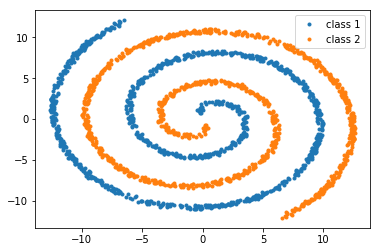

In [0]:
def twospirals(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000)

plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=10, batch_size=10,  verbose=1)

X_test, y_test = twospirals(1000)


Epoch 1/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6804 - acc: 0.5770
Epoch 2/10
2000/2000 [==============================] - 0s 153us/step - loss: 0.6726 - acc: 0.5855
Epoch 3/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6678 - acc: 0.5925
Epoch 4/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6639 - acc: 0.6075
Epoch 5/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6603 - acc: 0.6035
Epoch 6/10
2000/2000 [==============================] - 0s 164us/step - loss: 0.6557 - acc: 0.6290
Epoch 7/10
2000/2000 [==============================] - 0s 152us/step - loss: 0.6526 - acc: 0.6190
Epoch 8/10
2000/2000 [==============================] - 0s 154us/step - loss: 0.6488 - acc: 0.6275
Epoch 9/10
2000/2000 [==============================] - 0s 149us/step - loss: 0.6458 - acc: 0.6245
Epoch 10/10
2000/2000 [==============================] - 0s 151us/step - loss: 0.6425 - acc: 0.6170


In [0]:
yy = np.round(model.predict(X_test))
print(yy.shape)
yy = np.round(yy)
print(yy.shape)
yy = yy[:,0]
print(yy.shape)
print(np.unique(yy))


(2000, 1)
(2000, 1)
(2000,)
[0. 1.]


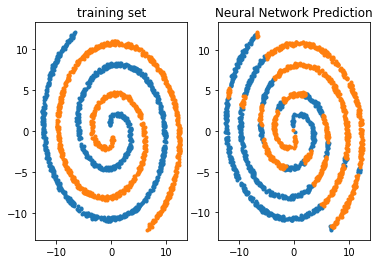

In [0]:
plt.subplot(1,2,1)
plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.')
plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network Prediction')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()



## 6. Efecto de la Tasa de Aprendizaje y el Tamaño de Batch



En esta sección evaluaremos el efecto de la tasa de aprendizaje y el tamaño de batch.


NUMERO DE CLASES: 10
2.499836836132744
-2.0278362071610654
Tasa de Aprendizaje (Learning Rate) = 100
11.927391052246094
2.5932576656341553
Tasa de Aprendizaje (Learning Rate) = 10
3.602703809738159
2.322754144668579
Tasa de Aprendizaje (Learning Rate) = 1
2.32047176361084
1.3962478637695312
Tasa de Aprendizaje (Learning Rate) = 0.1
2.31976318359375
2.121269941329956
Tasa de Aprendizaje (Learning Rate) = 0.01
2.4569125175476074
2.4328882694244385
Tasa de Aprendizaje (Learning Rate) = 0.001
2.334698438644409
2.332547426223755


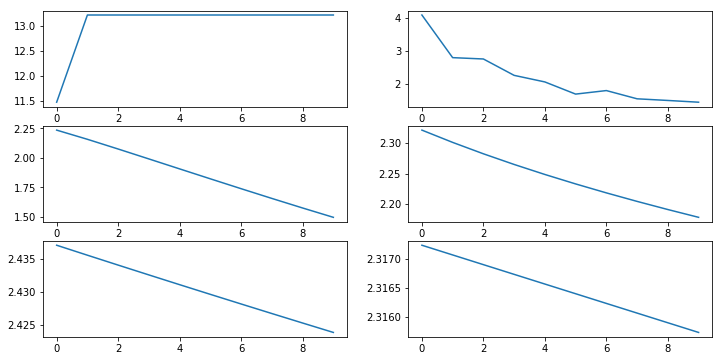

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=10, n_features=10, cluster_std=1, random_state=2)

n_classes = len(np.unique(y))
print("NUMERO DE CLASES: %d"%n_classes)

y = to_categorical(y)

n_train = 50
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

print(np.max(trainX))
print(np.min(trainX))

def create_ann(n_h):
  model = Sequential()
  model.add(Dense(n_h, input_dim=trainX.shape[1], activation="sigmoid"))
  model.add(Dense(n_classes, activation="softmax"))
  return model
   
n_h = 20
n_epochs = 10
fig, axis = plt.subplots(3, 2, figsize=(12, 6))
axs = axis.reshape(-1)

learning_rates = [100, 10, 1, 0.1, 0.01, 0.001]

for i in range(len(learning_rates)):
  
  model = create_ann(n_h)
  opt=SGD(lr=learning_rates[i],decay=0, momentum=0, nesterov=False)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  print("Tasa de Aprendizaje (Learning Rate) = %g"%learning_rates[i])
  history = model.fit(trainX, trainy, epochs=n_epochs, batch_size=len(trainX), verbose=0, validation_data=(testX,testy))
  axs[i].plot(history.history['val_loss'], label=str(learning_rates[i]))
  train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
  test_loss, test_acc = model.evaluate(testX, testy, verbose=0)
  print(np.max(history.history['loss']))
  print(np.min(history.history['loss']))
  #axs[i].set_ylim(0, 1)
  
plt.show()

#check momentums
momentums = [0.0, 0.5, 0.9, 0.99]

## Conclusiones de la Experiencia

Qué aprendió hoy?